Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [109]:
import logging
from collections import namedtuple
import random
from matplotlib import pyplot as plt

logging.getLogger().setLevel(logging.INFO)

In [110]:
PROBLEM_SIZE = 500
POPULATION_SIZE = 5
OFFSPRING_SIZE = 3

#PROBLEM_SIZE = 10
#POPULATION_SIZE = 30
#OFFSPRING_SIZE = 20

# This is the number of times that a complete generation of new offsprings has to be performed
NUM_GENERATIONS = 100#4000

In [111]:
Individual = namedtuple("Individual", ["genome", "fitness"])

# In this problem the PROBLEM space and the SOLUTION space are exactly the same because an individual (genome) is also a 
#candidate solution

# Here we want a STEADY STATE approach (intead of a GENERATIONAL one), because we don't generate a lot of individuals 

# Fitness function (calculates how many 1's are in the candidate solution)
# (this is a NON-deceptive fitness function)
def onemax(genome):
    return sum(genome)

# Picks at random k individuals and between them returns the maximum
# Note: the tournament_size is called TAU
def tournament(population, tournament_size=2):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitness)

# Returns a cross-over between two individuals, this is a very too simple cross-over technique (it can be improved)
def cross_over(g1, g2):
    cut = random.randint(0, PROBLEM_SIZE)
    return g1[:cut] + g2[cut:]

# Using cross-over is common to obtain individuals that are exactly the same / very similar, and from that point cross-over
# doesn't work anymore, so we NEED some kind of MUTATION!
def mutation(g):
    point = random.randint(0, PROBLEM_SIZE - 1)
    # Reversing one of the 1/0 in a random point of the individual/genome
    return g[:point] + (1 - g[point],) + g[point + 1 :]

# You can also make a random choiche between the GENETIC OPERATOR to apply each time.

# Genetic Algorithm

## Initial Population

In [112]:
population = list()

for genome in [tuple([random.choice([1, 0]) for _ in range(PROBLEM_SIZE)]) for _ in range(POPULATION_SIZE)]:
    population.append(Individual(genome, onemax(genome)))

#for _ in population:
#    print(_)

logging.info(f"init: pop_size={len(population)}; max={max(population, key=lambda i: i.fitness)[1]}")

INFO:root:init: pop_size=5; max=289


## Evolution

In [113]:
fitness_log = [(0, i.fitness) for i in population]

exit = 0
for g in range(NUM_GENERATIONS):
    offspring = list()
    for i in range(OFFSPRING_SIZE):
        # Using a value higher than 0.3 allows to find a solution faster
        if random.random() < 0.7:
            p = tournament(population)
            o = mutation(p.genome)
        else:
            p1 = tournament(population)
            p2 = tournament(population)
            o = cross_over(p1.genome, p2.genome)
        f = onemax(o)
        fitness_log.append((g + 1, f))
        offspring.append(Individual(o, f))
        # early stopping criterion
        if offspring[0].fitness == 500:
            print(f"FOUND at {g+1}")
            exit=1
            break
    # ONLY HERE the generated offspring are added to the population, doing it too soon could lead to wrong dynamics, an offspring of a generation
    # can be selected as a parent inside the same generation.
    # You need to generate offsprings from the current population and only at the END of the generation you can put them back inside the population.
    population += offspring
    # Sorting the population and cutting off the population 'til population size, keeping only a population size number of individuals
    population = sorted(population, key=lambda i: i.fitness, reverse=True)[:POPULATION_SIZE]
    # early stopping criterion
    if exit:
        break
    

## Performance Evaluation

Text(0, 0.5, 'Fitness')

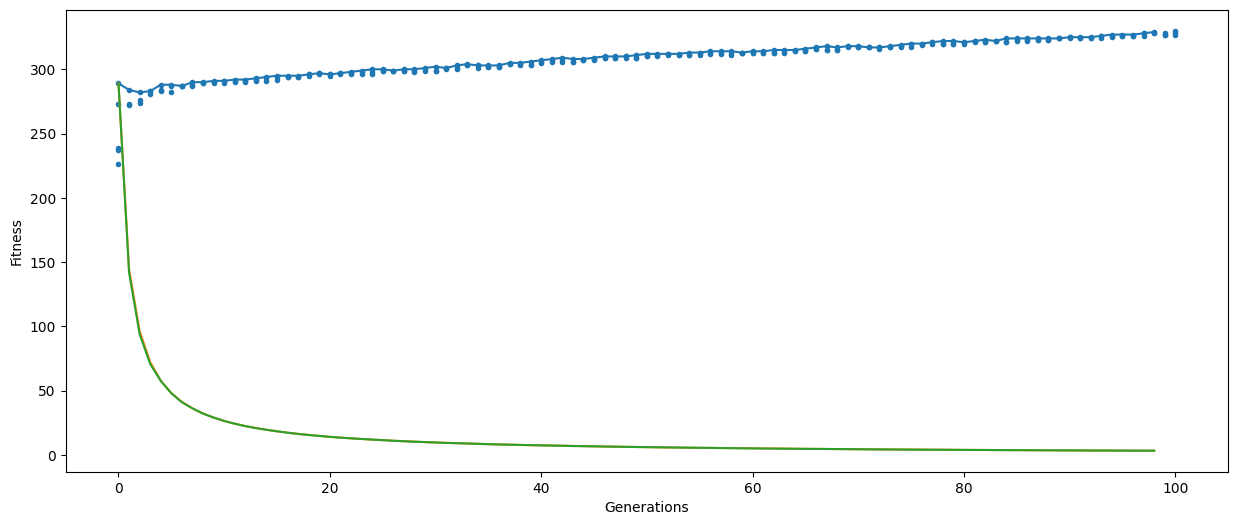

In [114]:
off_line = [max(f[1] for f in fitness_log if f[0] == x) / (x + 1) for x in range(g)]#range(NUM_GENERATIONS)]
on_line = [max(f[1] for f in fitness_log if f[0] <= x) / (x + 1) for x in range(g)]#range(NUM_GENERATIONS)]
gen_best = [max(f[1] for f in fitness_log if f[0] == x) for x in range(g)]#range(NUM_GENERATIONS)]

plt.figure(figsize=(15, 6))
plt.scatter([x for x, _ in fitness_log], [y for _, y in fitness_log], marker=".")
plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)])
plt.plot([x for x, _ in enumerate(on_line)], [y for _, y in enumerate(on_line)])
plt.plot([x for x, _ in enumerate(off_line)], [y for _, y in enumerate(off_line)])
plt.xlabel("Generations")
plt.ylabel("Fitness")